## Working With Missing And Duplicate Data

As we near the end of our course, we'll cover a topic that's essential to any data cleaning workflow - handling missing and duplicate data.

Missing or duplicate data may exist in a data set for a number of different reasons. Sometimes, missing or duplicate data is introduced as we perform cleaning and transformation tasks such as:

- Combining data
- Reindexing data
- Reshaping data

Other times, it exists in the original data set for reasons such as:

- User input error
- Data storage or conversion issues

In the case of missing values, they may also exist in the original data set to purposely indicate that data is unavailable.

In this lesson, we'll explore each of these options in detail and learn when to use them. We'll work with the 2015, 2016, and 2017 World Happiness Reports again - more specifically, we'll combine them and clean missing values as we start to define a more complete data cleaning workflow. You can find the data sets [here](https://www.kaggle.com/unsdsn/world-happiness#2015.csv), along with descriptions of each of the columns.

In this lesson, we'll work with modified versions of the data sets. Each data set has already been updated so that each contains the same countries. For example, if a country appeared in the original 2015 report, but not in the original 2016 report, a row like the one below was added to the 2016 data set:

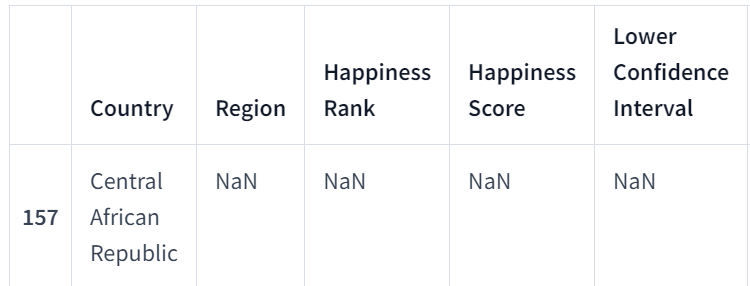

You'll notice that we revisit some of the concepts we learned in previous lessons, such as combining data and vectorized string methods. This is to start giving you a sense of how all the data cleaning concepts we've learned fit together and better prepare you to work on the guided project at the end of this course!

Let's start by gathering information about the dataframes.

We've already read in the modified 2015, 2016, and 2017 World Happiness Reports to the variables happiness2015, happiness2016, and happiness2017, respectively. We also updated each dataframe so that each contain the same countries, as described above

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
happiness2015 = pd.read_csv("../../Datasets/wh_2015.csv")
happiness2016 = pd.read_csv("../../Datasets/wh_2016.csv")
happiness2017 = pd.read_csv("../../Datasets/wh_2017.csv")

In [3]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


## Identifying Missing Values

In [4]:
happiness2015.shape

(164, 13)

In [5]:
happiness2016.shape

(164, 14)

In [6]:
happiness2017.shape

(164, 13)

In the last exercise, we confirmed that each data set contains the same number of rows.

Recall that the dataframes were updated so that each contains the same countries, even if the happiness score, happiness rank, etc. were missing. However, that also means that each likely contains missing values, like the one we reviewed in the previous screen:



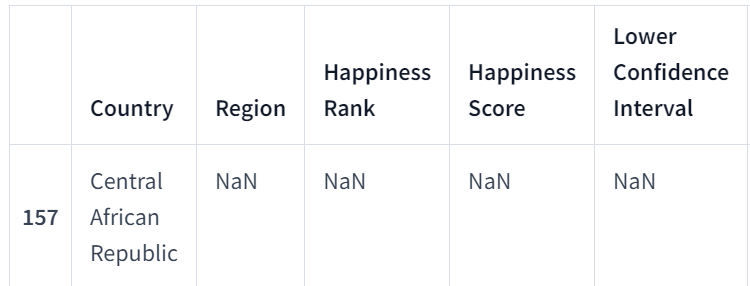

In pandas, missing values are generally represented by the NaN value, as seen in the dataframe above, or the None value.

However, it's good to note that pandas will not automatically identify values such as n/a, -, or -- as NaN or None, but they may also indicate data is missing. See [here](https://stackoverflow.com/questions/40011531/in-pandas-when-using-read-csv-how-to-assign-a-nan-to-a-value-thats-not-the#answer-40011736) for more information on how to use the pd.read_csv() function to read those values in as NaN.

Once we ensure that all missing values were read in correctly, we can use the [Series.isnull() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isnull.html) to identify rows with missing values:

In [7]:
missing = happiness2015['Happiness Score'].isnull()
missing_2015 = happiness2015[missing]
missing_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


However, when working with bigger data sets, it's easier to get a summary of the missing values as follows:

In [8]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

The result is a series in which:

- The index contains the names of the columns in happiness2015- - .
- The corresponding value is the number of null values in each column.

In happiness2015, all columns except for the Country and Year columns have six missing values.

Let's confirm the number of missing values in happiness2016 and happiness2017 next.

In [9]:
happiness2016.isnull().sum()

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [10]:
happiness2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

## Correcting Data Cleaning Errors that Result in Missing Values

In the previous exercise, you should've confirmed that happiness2016 and happiness2017 also contain missing values in all columns except for Country and Year. It's good to check for missing values before transforming data to make sure we don't unintentionally introduce missing values.

If we do introduce missing values after transforming data, we'll have to determine if the data is really missing or if it's the result of some kind of error. As we progress through this lesson, we'll use the following workflow to clean our missing values, starting with checking for errors:

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.

Let's return to a task we completed in a previous lesson - combining the 2015, 2016, and 2017 World Happiness Reports. Recall that we can use the [pd.concat() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to combine them:

In [11]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

Next, let's check for missing values in combined:

In [12]:
combined.isnull().sum()

Country                            0
Region                           177
Happiness Rank                   177
Happiness Score                  177
Standard Error                   334
Economy (GDP per Capita)         177
Family                            22
Health (Life Expectancy)         177
Freedom                           22
Trust (Government Corruption)    177
Generosity                        22
Dystopia Residual                177
Year                               0
Lower Confidence Interval        335
Upper Confidence Interval        335
Happiness.Rank                   337
Happiness.Score                  337
Whisker.high                     337
Whisker.low                      337
Economy..GDP.per.Capita.         337
Health..Life.Expectancy.         337
Trust..Government.Corruption.    337
Dystopia.Residual                337
dtype: int64

We can see above that our dataframe has many missing values and these missing values follow a pattern. Most columns fall into one of the following categories:

- 177 missing values (about 1/3 of the total values)
- 337 missing values (about 2/3 of the total values)

You may have also noticed that some of the column names differ only by punctuation, which caused the dataframes to be combined incorrectly:

Trust (Government Corruption)

Trust..Government.Corruption.

In the next exercise, we'll update the column names to make them uniform and combine the dataframes again. To clean the column names, we recommend using a technique we haven't covered yet, described in [this Stack Overflow answer](https://stackoverflow.com/questions/39741429/pandas-replace-a-character-in-all-column-names).

As you start to work on more data cleaning tasks, you'll inevitably encounter scenarios you don't know specifically how to handle. Stack Overflow is a great place to reference to get answers for these questions, as other people have likely already asked the same question and solicited answers.

As a reminder, below is a list of common string methods you can use to clean the columns:

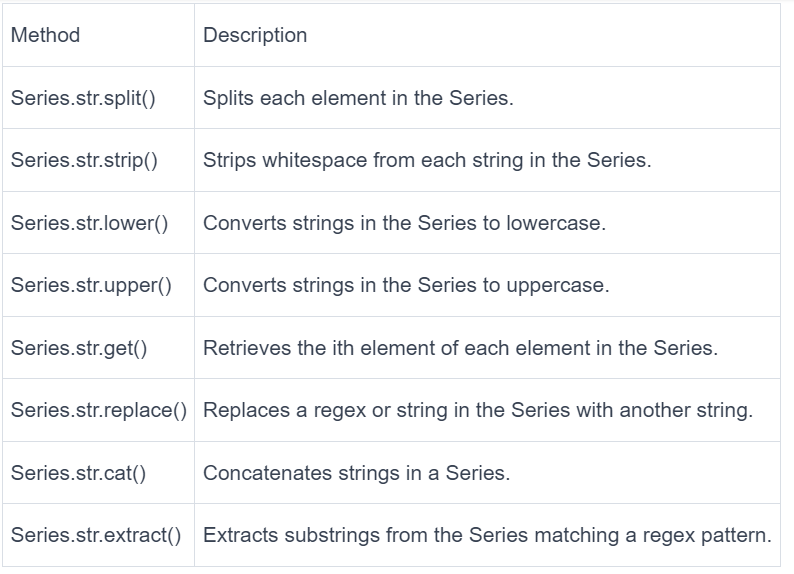

In [13]:
# happiness2015.columns = happiness2017.columns
# happiness2015.columns = happiness2017.columns

In [14]:
happiness2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [15]:
happiness2015.columns = (happiness2015.columns.str.replace("[()]", "", regex=True).str.
replace(r"\s+", " ", regex=True).str.strip().str.upper())
happiness2015.columns

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'STANDARD ERROR', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')

In [16]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace(r'\s+', ' ', regex=True).str.strip().str.upper()
happiness2017.columns

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')

In [17]:
happiness2016.columns = (happiness2016.columns.str.
 replace(r"[()]", "", regex=True).str.
 replace(r"\s+", " ").str.strip().str.upper()
)
happiness2016.columns

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR'],
      dtype='object')

In [18]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace(r'\s+', ' ', regex=True).str.strip().str.upper()


happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
missing = combined.isnull().sum()
missing

COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64

## Visualizing Missing Data

In the last exercise, we corrected some of the missing values by fixing the column names. Note that we could have cleaned the column names without changing the capitalization. It's good practice, however, to make the capitalization uniform, because a stray uppercase or lowercase letter could've reintroduced missing values.

We also confirmed there are still values missing:

We can learn more about where these missing values are located by visualizing them with a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html), a graphical representation of our data in which values are represented as colors. We'll use the seaborn library to create the heatmap.

Note below that we first reset the index to be the YEAR column so that we'll be able to see the corresponding year on the left side of the heatmap:

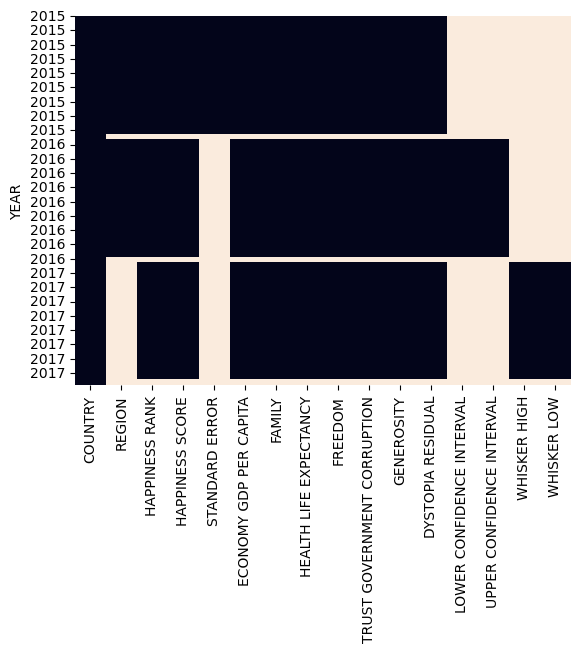

In [19]:
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

To understand this visualization, imagine we took combined, highlighted missing values in light gray and all other values in black, and then shrunk it so that we could easily view the entire dataframe at once.

Since we concatenated happiness2015, happiness2016, and happiness2017 by stacking them, note that the top third of the dataframe corresponds to the 2015 data, the second third corresponds to the 2016 data, and the bottom third corresponds to the 2017 data.

We can make the following observations:

- No values are missing in the COUNTRY column.
- There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the COUNTRY column.
- Some columns only have data populated for one year.
- It looks like the REGION data is missing for the year 2017.

Confirm that the REGION column is missing from the 2017 data. Recall that there are 164 rows for the year 2017.

In [20]:
combined[combined['YEAR'] == 2017]['REGION'].isnull().sum()

164

In [21]:
happiness2017.shape

(164, 13)

## Using Data From Additional Sources to Fill in Missing Values

In the last exercise, we confirmed that the REGION column is missing from the 2017 data. Since we need the regions to analyze our data, let's turn our attention there next.

 Before we drop or replace any values, let's first see if there's a way we can use other available data to correct the values.

- Check for errors in data cleaning/transformation.
- Use data from additional sources to fill missing values.
- Drop row/column.
- Fill missing values with reasonable estimates computed from the available data.

Recall once more that each year contains the same countries. Since the regions are fixed values - the region a country was assigned to in 2015 or 2016 won't change - we should be able to assign the 2015 or 2016 region to the 2017 row.

In order to do so, we'll use the following strategy:

Create a dataframe containing all of the countries and corresponding regions from the happiness2015, happiness2016, and happiness2017 dataframes.

Use the [pd.merge() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) to assign theREGIONin the dataframe above to the corresponding country incombined`.

Note that there are other ways to complete this task. We encourage you to explore them on your own.

In [22]:
hap15 = happiness2015[['COUNTRY', 'REGION']]

In [23]:
hap16 = happiness2016[['COUNTRY', 'REGION']]
hap15['REGION'].isnull().sum()

6

In [24]:
new = pd.merge(hap15, hap16, on = 'COUNTRY', how='outer')

In [25]:
new[new['REGION_y'].isnull() |new['REGION_x'].isnull() ]

,COUNTRY,REGION_x,REGION_y
13,Belize,NaN,Latin America and Caribbean
26,Central African Republic,Sub-Saharan Africa,NaN
39,Djibouti,Sub-Saharan Africa,NaN
79,Lesotho,Sub-Saharan Africa,NaN
97,Mozambique,Sub-Saharan Africa,NaN
99,Namibia,NaN,Sub-Saharan Africa
108,Oman,Middle East and Northern Africa,NaN
117,Puerto Rico,NaN,Latin America and Caribbean
129,Somalia,NaN,Sub-Saharan Africa
130,Somaliland Region,NaN,Sub-Saharan Africa


In [26]:
new['REGION'] = new['REGION_x'].fillna(new['REGION_y'])

In [27]:
hap17 = happiness2017[["COUNTRY"]]

In [28]:
new[new['REGION_y'].isnull() |new['REGION_x'].isnull() ]

,COUNTRY,REGION_x,REGION_y,REGION
13,Belize,NaN,Latin America and Caribbean,Latin America and Caribbean
26,Central African Republic,Sub-Saharan Africa,NaN,Sub-Saharan Africa
39,Djibouti,Sub-Saharan Africa,NaN,Sub-Saharan Africa
79,Lesotho,Sub-Saharan Africa,NaN,Sub-Saharan Africa
97,Mozambique,Sub-Saharan Africa,NaN,Sub-Saharan Africa
99,Namibia,NaN,Sub-Saharan Africa,Sub-Saharan Africa
108,Oman,Middle East and Northern Africa,NaN,Middle East and Northern Africa
117,Puerto Rico,NaN,Latin America and Caribbean,Latin America and Caribbean
129,Somalia,NaN,Sub-Saharan Africa,Sub-Saharan Africa
130,Somaliland Region,NaN,Sub-Saharan Africa,Sub-Saharan Africa


In [29]:
region = new[['COUNTRY', 'REGION']]

In [30]:
combined = pd.merge(combined, region, how='left', on='COUNTRY').drop('REGION_x', axis=1)

In [31]:
combined.isnull().sum()

COUNTRY                          0
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
REGION_y                         0
dtype: int64

##  Identifying Duplicates Values

In [32]:
combined.rename({"REGION_y":"REGION"}, axis=1, inplace=True)

On the previous screen, we used the 2015 and 2016 data to fill in the missing region values for the 2017 data. Note that we renamed the corrected region column to REGION separately to avoid confusion in the following exercises.

Before we decide how to handle the rest of our missing values, let's first check our dataframe for duplicate rows.

We'll use the [DataFrame.duplicated() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) to check for duplicate values. If no parameters are specified, the method will check for any rows in which all columns have the same values.

In [33]:
combined[combined.duplicated(['COUNTRY', 'YEAR'])]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION


Since the dataframe is empty, we can tell that there are no rows with exactly the same country AND year.

However, one thing to keep in mind is that the df.duplicated() method will only look for exact matches, so if the capitalization for country names isn't exactly the same, they won't be identified as duplicates. To be extra thorough, we can first standardize the capitalization for the COUNTRY column and then check for duplicates again.

In [34]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()

In [35]:
combined[combined.duplicated(subset=['COUNTRY', 'YEAR'])]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


## Correcting Duplicates Values

In the previous screen, we standardized the capitalization of the values in the COUNTRY column and identified that we actually do have three duplicate rows!

In [36]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined_dups = combined[dups]
combined_dups

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


In [37]:
somaliland_combined = combined[combined['COUNTRY'] == 'SOMALILAND REGION']
somaliland_combined

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION
90,SOMALILAND REGION,91.0,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
260,SOMALILAND REGION,97.0,5.057,NaN,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,2016,4.934,5.18,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


Now, we can see that there are two rows for 2015, 2016, and 2017 each.

Next, let's use the [df.drop_duplicates() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to drop the duplicate rows. Like the df.duplicated() method, the df.drop_duplicates() method will define duplicates as rows in which all columns have the same values. We'll have to specify that rows with the same values in only the COUNTRY and YEAR columns should be dropped.

It's also important to note that by default, the drop_duplicates() method will only keep the first duplicate row. To keep the last duplicate row, set the keep parameter to 'last'. Sometimes, this will mean sorting the dataframe before dropping the duplicate rows.

In our case, since the second duplicate row above contains more missing values than the first row, we'll keep the first row.

In [38]:
combined.drop_duplicates(["COUNTRY", "YEAR"], inplace=True)

## Handle Missing Values by Dropping Columns

Now that we've corrected the duplicate values in the dataframe, let's turn our attention back to the rest of our missing values. So far, to correct missing values we:

1. Corrected the errors we made when combining our dataframes.
2. Used the 2015 and 2016 region values to fill in the missing regions for 2017.

Many of the methods in pandas are designed to exclude missing values without removing them, so at this point, we could leave the rest of the missing values as is, depending on the question we're trying to answer.

However, leaving missing values in the dataframe could cause issues with other transformation tasks and change the distribution of our data set. Also note that missing data has to be dropped or replaced to work with machine learning algorithms, so if you're interested in continuing in the data science path, it's important to know how to handle them.

Next, we'll consider dropping columns with missing data:

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.

First, let's confirm how many missing values are now left in the dataframe:

In [39]:
combined.isnull().sum()

COUNTRY                          0
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
STANDARD ERROR                 331
ECONOMY GDP PER CAPITA          19
FAMILY                          19
HEALTH LIFE EXPECTANCY          19
FREEDOM                         19
TRUST GOVERNMENT CORRUPTION     19
GENEROSITY                      19
DYSTOPIA RESIDUAL               19
YEAR                             0
LOWER CONFIDENCE INTERVAL      332
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
REGION                           0
dtype: int64

We can see above that a couple columns contain over 300 missing values. Let's start by analyzing these columns since they account for most of the missing values left in the dataframe.

whether you'll lose information that could alter your analysis. Instead of just saying, "If x percentage of the data is missing, we'll drop it.", it's better to also ask the following questions:

1. Is the missing data needed to accomplish our end goal?2. 
How will removing or replacing the missing values affect our analysis?


To answer the first question, let's establish our end goal:

- End Goal: We want to analyze happiness scores and the factors that contribute to happiness scores by year and region.

Since missing values make up more than half of the following columns and we don't need them to accomplish our end goal, we'll drop them:

- STANDARD ERROR
- LOWER CONFIDENCE INTERVAL
- UPPER CONFIDENCE INTERVAL
- WHISKER HIGH
- WHISKER LOW

We'll use the [DataFrame.drop() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) to drop them next.

In [40]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

In [41]:
combined.drop(columns_to_drop, axis=1)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,REGION
0,SWITZERLAND,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,Western Europe
1,ICELAND,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,Western Europe
2,DENMARK,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,Western Europe
3,NORWAY,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,Western Europe
4,CANADA,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
486,OMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Middle East and Northern Africa
487,PUERTO RICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Latin America and Caribbean
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
490,SURINAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Latin America and Caribbean


In [42]:
combined.isnull().sum()

COUNTRY                          0
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
STANDARD ERROR                 331
ECONOMY GDP PER CAPITA          19
FAMILY                          19
HEALTH LIFE EXPECTANCY          19
FREEDOM                         19
TRUST GOVERNMENT CORRUPTION     19
GENEROSITY                      19
DYSTOPIA RESIDUAL               19
YEAR                             0
LOWER CONFIDENCE INTERVAL      332
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
REGION                           0
dtype: int64

In the last exercise, we used the df.drop() method to drop columns we don't need for our analysis.

However, as you start working with bigger datasets, it can sometimes be tedious to create a long list of column names to drop. Instead we can use the [DataFrame.dropna() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) to complete the same task.

By default, the dropna() method will drop rows with any missing values. To drop columns, we can set the axis parameter equal to 1, just like with the df.drop() method:

In [43]:
combined.dropna(axis=1)

,COUNTRY,YEAR,REGION
0,SWITZERLAND,2015,Western Europe
1,ICELAND,2015,Western Europe
2,DENMARK,2015,Western Europe
3,NORWAY,2015,Western Europe
4,CANADA,2015,North America
...,...,...,...
486,OMAN,2017,Middle East and Northern Africa
487,PUERTO RICO,2017,Latin America and Caribbean
488,SOMALILAND REGION,2017,Sub-Saharan Africa
490,SURINAME,2017,Latin America and Caribbean


However, this would result in dropping columns with any missing values - we only want to drop certain columns. Instead, we can also use the thresh parameter to only drop columns if they contain below a certain number of non-null values.

So far, we've used the df.isnull() method to confirm the number of missing values in each column. To confirm the number of values that are NOT missing, we can use the [DataFrame.notnull()method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html):

In [44]:
print(combined.notnull().sum().sort_values())

WHISKER LOW                    155
WHISKER HIGH                   155
LOWER CONFIDENCE INTERVAL      157
UPPER CONFIDENCE INTERVAL      157
STANDARD ERROR                 158
TRUST GOVERNMENT CORRUPTION    470
HAPPINESS RANK                 470
HAPPINESS SCORE                470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
HEALTH LIFE EXPECTANCY         470
FREEDOM                        470
GENEROSITY                     470
DYSTOPIA RESIDUAL              470
COUNTRY                        489
YEAR                           489
REGION                         489
dtype: int64


Above, we can see that the columns we'd like to drop - LOWER CONFIDENCE INTERVAL, STANDARD ERROR, UPPER CONFIDENCE INTERVAL, WHISKER HIGH, and WHISKER LOW - only contain between 155 and 158 non null values. As a result, we'll set the thresh parameter equal to 159 in the df.dropna() method to drop them.

In [48]:
combined = combined.dropna(axis=1, thresh=159)

In [49]:
combined.isnull().sum()

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION                          0
dtype: int64

## Analyzing Missing Data

In the last exercise, we dropped columns we don't need for our analysis and confirmed that a couple columns still have missing values:

In [50]:
print(combined.isnull().sum())

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION                          0
dtype: int64


To make a decision about how to handle the rest of the missing data, we'll analyze if it's better to just drop the rows or replace the missing values with other values.

Let's return to the following questions:

1. Is the missing data needed to accomplish our end goal?
   - Yes, we need the data to accomplish our goal of analyzing happiness scores and contributing factors by region and year.
2. How will removing or replacing the missing values affect our analysis?

Let's break the second question down into a couple more specific questions:

- What percentage of the data is missing?- 
Will dropping missing values cause us to lose valuable information in other columns? - 
Can we identify any patterns in the missing data?

Question: What percentage of the data is missing?



As we saw when looking at the results of combined.isnull().sum() above, if missing values exist in a column of our dataframe, they account for about 4 percent of the total values (19 missing out of 489 values per column).

Generally speaking, the lower the percentage of missing values, the less likely dropping them will significantly impact the analysis.

Question: Will dropping missing values cause us to lose valuable information in other columns?

To answer this question, let's visualize the missing data once more. Note below that before we create the heatmap, we first set the index of combined to the REGION column and sort the values:

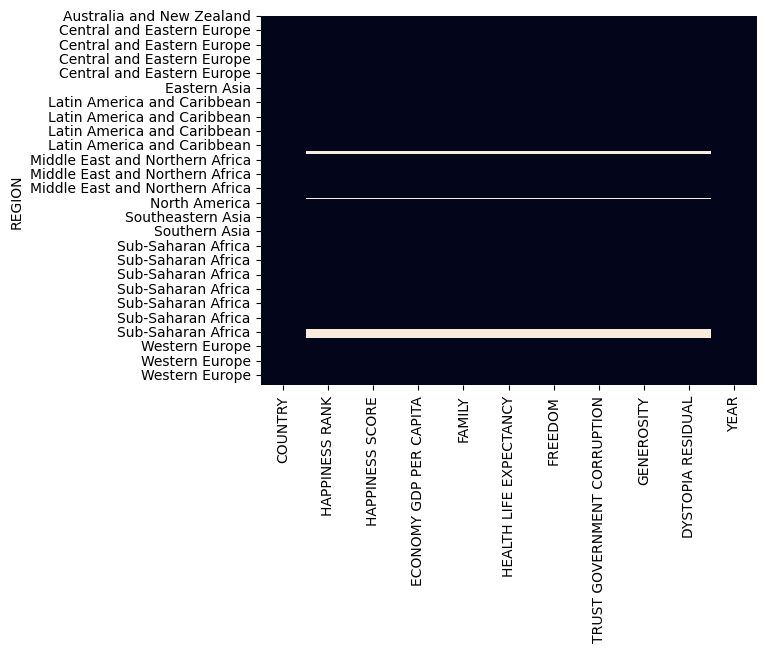

In [53]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)
plt.show()

As a reminder, in the heatmap above, the missing values are represented with light gray and all other values with black. From this visualization, we can confirm that if the data is missing, it's missing in almost every column. We'll conclude that dropping the missing values won't cause us to lose valuable information in other columns.

Question: Can we identify any patterns in the missing data?

From the visualization above, we can also identify that only three regions contain missing values:

- Sub-Saharan Africa
- Middle East and Northern Africa
- Latin America and Carribbean

The Sub-Saharan Africa region contains the most missing values, accounting for about 9 percent of that regions's values. Since we'd like to analyze the data according to region, we should also think about how these values impact the analysis for this region specifically.

## Handling Missing Values with Imputation

In the last screen, we confirmed:

- Only about 4 percent of the values in each column are missing.
- Dropping rows with missing values won't cause us to lose information in other columns.

As a result, it may be best to drop the remaining missing values.

However, before we make a decision, let's consider handling the missing values by replacing them with estimated values, also called imputation.

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.

There are many options for choosing the replacement value, including:

- A constant value
- The mean of the column
- The median of the column
- The mode of the column

For non-numeric columns, common replacement values include the most frequent value or a string like "Unknown" that is used to treat missing values as a separate category.

For numeric columns, it's very common to replace missing values with the mean. Since the rest of the columns in combined with missing data are all numeric, we'll explore this option next.

First, let's build some intuition around this technique by analyzing how replacing missing values with the mean affects the distribution of the data. In order to do so, we'll use the [Series.fillna() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html) to replace the missing values with the mean.

Note that we must pass the replacement value into the Series.fillna() method. For example, if we wanted to replace all of the missing values in the HAPPINESS SCORE column with 0, we'd use the following syntax:

In [54]:
combined['HAPPINESS SCORE'].fillna(0)

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
486    0.000
487    0.000
488    0.000
490    0.000
491    0.000
Name: HAPPINESS SCORE, Length: 489, dtype: float64

Next, let's replace the missing happiness scores with the mean.

In [55]:
combined['HAPPINESS SCORE'].fillna(combined['HAPPINESS SCORE'].mean())

0      7.587000
1      7.561000
2      7.527000
3      7.522000
4      7.427000
         ...   
486    5.370728
487    5.370728
488    5.370728
490    5.370728
491    5.370728
Name: HAPPINESS SCORE, Length: 489, dtype: float64

In [56]:
happiness_mean = combined['HAPPINESS SCORE'].mean()

combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'].mean())

5.370727659882891


In [57]:
happiness_mean

5.370727659882891

Did replacing missing values with the mean of a series cause the mean to change?

In the last exercise, we confirmed that replacing missing values with the Series mean doesn't change the mean of the Series.

If we were to plot the distributions before and after replacing the missing values with the mean, we'd see that the shape of the distribution changes as more values cluster around the mean. Note that the mean is represented with the red and green lines in the plots below:

<Axes: ylabel='Frequency'>

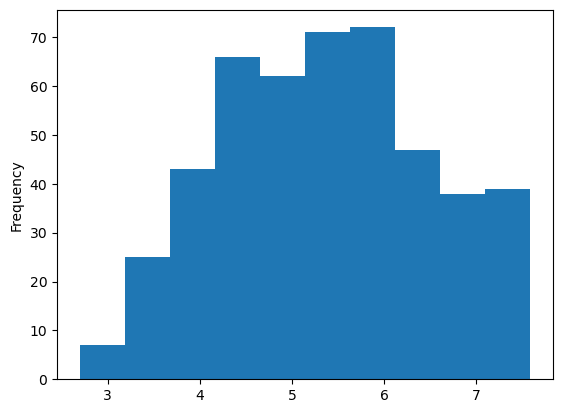

In [58]:
combined['HAPPINESS SCORE'].plot.hist()

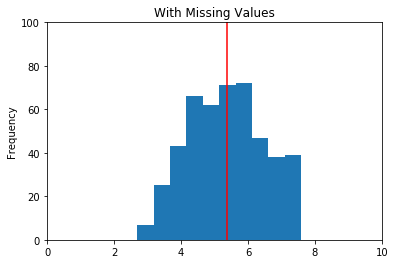

<Axes: ylabel='Frequency'>

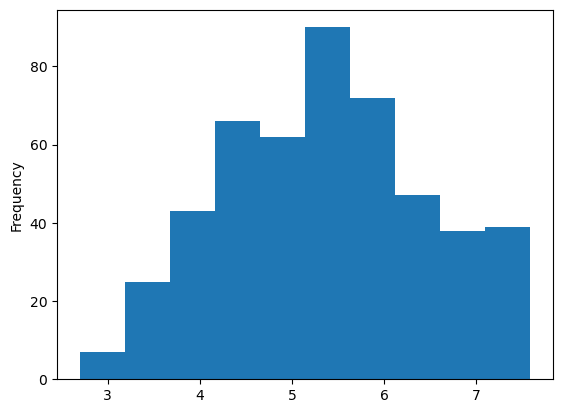

In [59]:
combined['HAPPINESS SCORE UPDATED'].plot.hist()

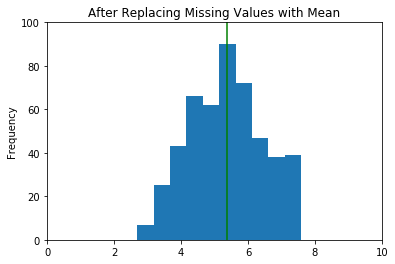

As we decide to use this approach, we should ask the following questions - are the missing happiness scores likely to be close to the mean? Or is it more likely that the scores are very high or very low? If the missing values lie at extremes, the mean won't be a good estimate for them.

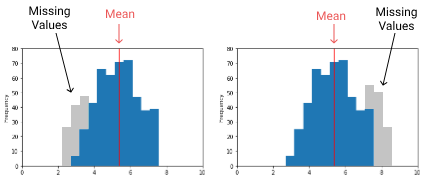


Recall that when we visualized the missing data, we determined that the Sub-Saharan Africa region contained the most missing values. Since we'd like to analyze the data according to region, let's look more closely at the means for each region:

In [60]:
pivot_table = combined.pivot_table(index='REGION', values='HAPPINESS SCORE',
                                  margins=True)

In [61]:
pivot_table

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


As a reminder, the All row in the table above represents the mean happiness score for the whole world - the value that we used to replace our missing values. We can see that the world mean happiness score, 5.370728, is over 1 point higher than the mean happiness score for the Sub-Saharan Africa region, 4.150957.

Also, if we think about the reasons why a country may not have participated in the happiness survey - war, natural disaster, etc - many of them would likely result in a lower happiness score than even the region's mean. We'll conclude that the mean for the whole world wouldn't be a good estimate for them.



As a result, we'll decide that of these two options, it's better to drop the rows with missing values. Let's do that next.

In [63]:
combined.dropna(inplace=True)

In [64]:
combined.isnull().sum()

COUNTRY                        0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
HEALTH LIFE EXPECTANCY         0
FREEDOM                        0
TRUST GOVERNMENT CORRUPTION    0
GENEROSITY                     0
DYSTOPIA RESIDUAL              0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64

In the last step, we concluded that in this case, it was better to drop the remaining rows with missing values rather than replace the missing values with the mean.

However, it's also good to know that other techniques for handling missing values do exist. Since this lesson is meant to be an introduction to this topic, we didn't cover them, but if you're interested in learning more, you can start [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

Although there is no perfect way to handle missing values and each situation is different, now we know the basic techniques and built some intuition around them to better inform our decisions. Below is the workflow we used to clean missing values:

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column
4. Fill missing values with reasonable estimates computed from the available data.

We also started to set a more defined data cleaning workflow, in which we:

- Set a goal for the project.
- Researched and tried to understand the data.
- Determined what data was needed to complete our analysis.
- Added columns.
- Cleaned specific data types.
- Combined data sets.
- Removed duplicate values.
- Handled the missing values.

Next, we'll synthesize and practice what we've learned in the Project.